In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Chocolate Sales (2).csv")
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04/01/2022,"$5,320.00",180
1,Van Tuxwell,India,85% Dark Bars,01/08/2022,"$7,896.00",94
2,Gigi Bohling,India,Peanut Butter Cubes,07/07/2022,"$4,501.00",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27/04/2022,"$12,726.00",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24/02/2022,"$13,685.00",184


In [3]:
df.info()

df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   3282 non-null   object
 1   Country        3282 non-null   object
 2   Product        3282 non-null   object
 3   Date           3282 non-null   object
 4   Amount         3282 non-null   object
 5   Boxes Shipped  3282 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 154.0+ KB


Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [5]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
df["Amount"].head()

0     5320.0
1     7896.0
2     4501.0
3    12726.0
4    13685.0
Name: Amount, dtype: float64

In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

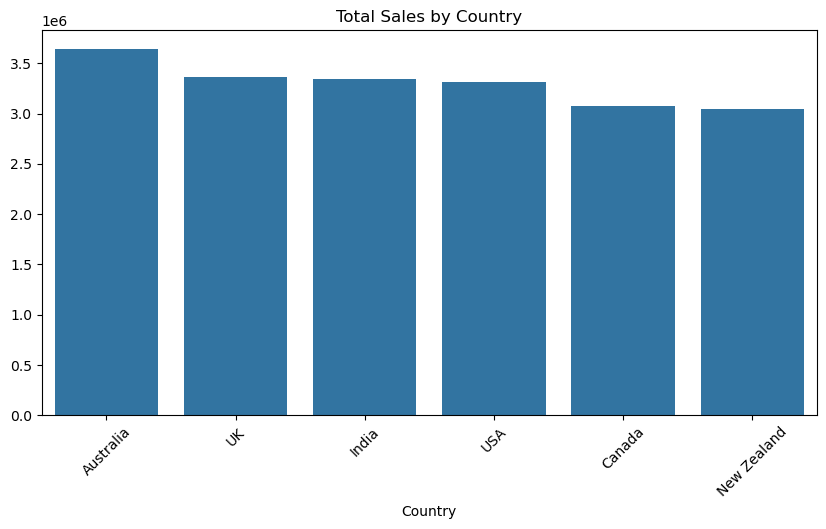

In [7]:
country_sales = df.groupby('Country')['Amount'].sum().sort_values(ascending=False)
country_sales
plt.figure(figsize=(10,5))
sns.barplot(x=country_sales.index, y=country_sales.values)
plt.title('Total Sales by Country')
plt.xticks(rotation=45)
plt.show()

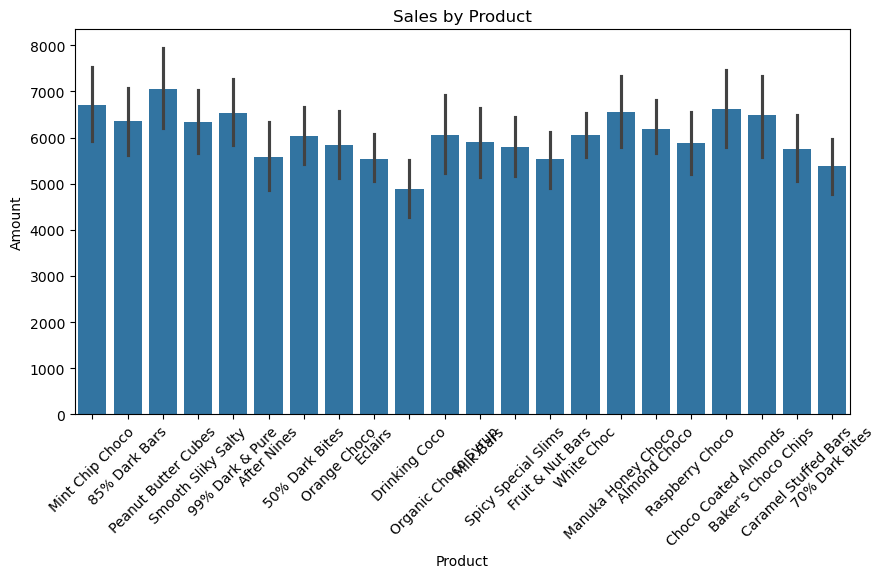

In [8]:
plt.figure(figsize=(10,5))
sns.barplot(x='Product', y='Amount', data=df)
plt.xticks(rotation=45)
plt.title('Sales by Product')
plt.show()

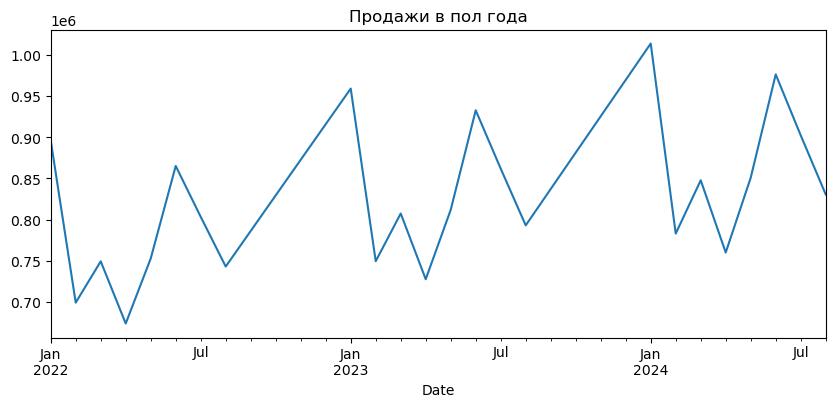

In [9]:
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['Amount'].sum()
monthly_sales.plot(figsize=(10,4), title='Продажи в пол года')
plt.show()

In [11]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Is_Weekend'] = df['Date'].dt.weekday >= 5
df['Revenue_per_Box'] = df['Amount'] / df['Boxes Shipped']


df.drop('Date', axis=1, inplace=True)

In [13]:
df_encoded = pd.get_dummies(
df,
columns=['Sales Person', 'Country', 'Product'],
drop_first=True
)

In [14]:
encoded = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product'], drop_first=True)

X = encoded.drop('Amount', axis=1)
y = encoded["Amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размер обучающей выборки: {X_train_scaled.shape}")
print(f"Размер тестовой выборки: {X_test_scaled.shape}")

Размер обучающей выборки: (2297, 56)
Размер тестовой выборки: (985, 56)


In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (2297, 56)
Размер тестовой выборки: (985, 56)


In [17]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [18]:
def evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    metrics = {
        'Model': model_name,
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'Train RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred)),
        'Test RMSE': np.sqrt(mean_squared_error(y_test, y_test_pred)),
        'Train MAE': mean_absolute_error(y_train, y_train_pred),
        'Test MAE': mean_absolute_error(y_test, y_test_pred)
    }
    
    return metrics, y_test_pred

In [19]:
lr = LinearRegression()
lr_metrics, lr_pred = evaluate_model(lr, "Linear Regression", 
                                     X_train_scaled, X_test_scaled, 
                                     y_train, y_test)

In [20]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr_metrics, svr_pred = evaluate_model(svr, "SVR", 
                                       X_train_scaled, X_test_scaled, 
                                       y_train, y_test)

In [21]:
ridge = Ridge(alpha=1.0, random_state=42)
ridge_metrics, ridge_pred = evaluate_model(ridge, "Ridge Regression", 
                                          X_train_scaled, X_test_scaled, 
                                          y_train, y_test)

In [22]:
lasso = Lasso(alpha=0.01, random_state=42)
lasso_metrics, lasso_pred = evaluate_model(lasso, "Lasso Regression", 
                                          X_train_scaled, X_test_scaled, 
                                          y_train, y_test)

In [23]:
dtr = DecisionTreeRegressor(max_depth=10, min_samples_split=5, 
                            min_samples_leaf=2, random_state=42)
dtr_metrics, dtr_pred = evaluate_model(dtr, "Decision Tree", 
                                       X_train, X_test, 
                                       y_train, y_test)

In [24]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
gbr_metrics, gbr_pred = evaluate_model(gbr, "Gradient Boosting", 
                                       X_train, X_test, 
                                       y_train, y_test)


In [25]:
rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf_metrics, rf_pred = evaluate_model(rf, "Random Forest", 
                                     X_train, X_test, 
                                     y_train, y_test)

In [26]:
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)
xgb_metrics, xgb_pred = evaluate_model(xgb_model, "XGBoost", 
                                       X_train, X_test, 
                                       y_train, y_test)

In [27]:
gbr = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
gbr_metrics, gbr_pred = evaluate_model(gbr, "Gradient Boosting", 
                                       X_train, X_test, 
                                       y_train, y_test)


In [28]:
voting_reg = VotingRegressor(
    estimators=[
        ('lr', LinearRegression()),
        ('ridge', Ridge(alpha=1.0, random_state=42)),
        ('rf', RandomForestRegressor(n_estimators=50, 
                                     max_depth=10, 
                                     random_state=42))
    ]
)
voting_metrics, voting_pred = evaluate_model(voting_reg, "Voting Regressor", 
                                            X_train_scaled, X_test_scaled, 
                                            y_train, y_test)

In [29]:
classical_models_metrics = [lr_metrics, ridge_metrics, lasso_metrics, 
                            svr_metrics, dtr_metrics]
classical_models_df = pd.DataFrame(classical_models_metrics)

In [30]:
ensemble_models_metrics = [rf_metrics, gbr_metrics, xgb_metrics, voting_metrics]
ensemble_models_df = pd.DataFrame(ensemble_models_metrics)

In [31]:
print(ensemble_models_df.round(4))

               Model  Train R2  Test R2  Train RMSE  Test RMSE  Train MAE  \
0      Random Forest    0.9967   0.9924    258.9215   364.4733   110.2571   
1  Gradient Boosting    0.9983   0.9935    182.3894   338.7775   131.7883   
2            XGBoost    0.9980   0.9865    201.1217   485.9955   145.5332   
3   Voting Regressor    0.5974   0.5466   2840.0491  2819.1184  2245.8243   

    Test MAE  
0   187.2210  
1   230.3973  
2   292.3593  
3  2238.3011  


In [32]:
classical_models_metrics = [lr_metrics, ridge_metrics, lasso_metrics, 
                            svr_metrics, dtr_metrics]
classical_models_df = pd.DataFrame(classical_models_metrics)

In [33]:
all_metrics_df = pd.concat([classical_models_df, ensemble_models_df], 
                           ignore_index=True)
all_metrics_df = all_metrics_df.sort_values('Test R2', ascending=False)

               Model  Train R2  Test R2  Train RMSE  Test RMSE  Train MAE  \
6  Gradient Boosting    0.9983   0.9935    182.3894   338.7775   131.7883   
5      Random Forest    0.9967   0.9924    258.9215   364.4733   110.2571   
7            XGBoost    0.9980   0.9865    201.1217   485.9955   145.5332   
4      Decision Tree    0.9824   0.9639    593.0882   795.4095   280.5315   
8   Voting Regressor    0.5974   0.5466   2840.0491  2819.1184  2245.8243   
1   Ridge Regression    0.1171   0.0184   4205.8160  4147.8778  3338.4371   
2   Lasso Regression    0.1171   0.0184   4205.8158  4148.0360  3338.3934   
0  Linear Regression    0.1171   0.0184   4205.8158  4148.0451  3338.3944   
3                SVR    0.0304   0.0167   4407.4921  4151.5007  3344.2576   

    Test MAE  
6   230.3973  
5   187.2210  
7   292.3593  
4   469.3755  
8  2238.3011  
1  3313.9476  
2  3313.9406  
0  3313.9437  
3  3282.3580  


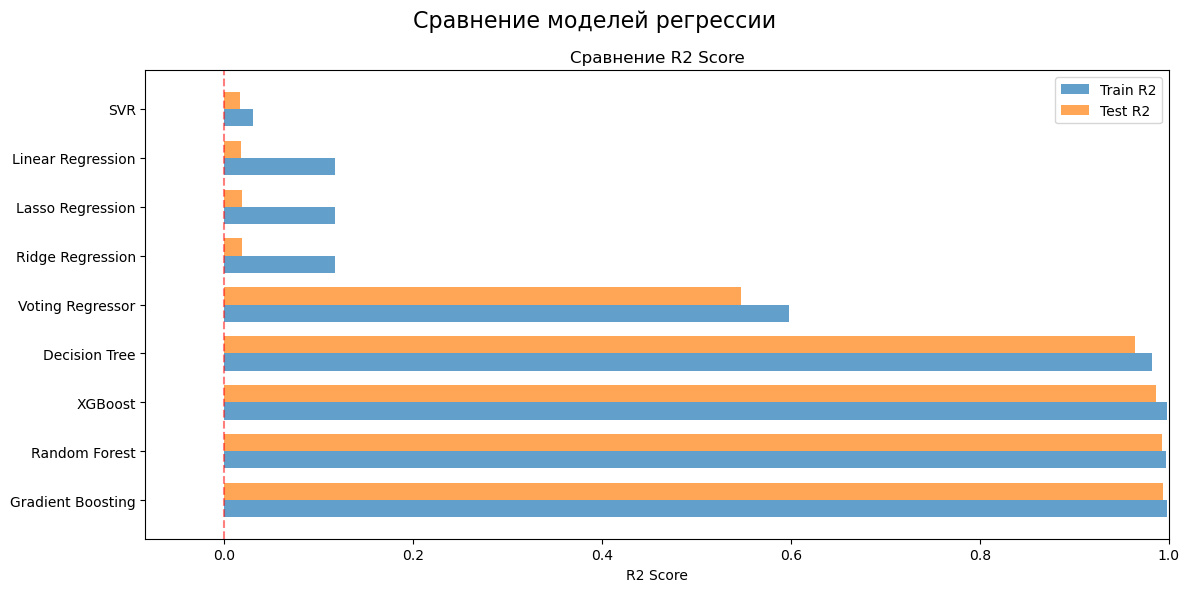

In [34]:
print(all_metrics_df.round(4))

fig, ax = plt.subplots(figsize=(12, 6))
fig.suptitle('Сравнение моделей регрессии', fontsize=16)

models = all_metrics_df['Model'].tolist()
test_r2 = all_metrics_df['Test R2'].tolist()
train_r2 = all_metrics_df['Train R2'].tolist()

x_pos = np.arange(len(models))
width = 0.35

bars1 = ax.barh(x_pos - width/2, train_r2, width, label='Train R2', alpha=0.7)
bars2 = ax.barh(x_pos + width/2, test_r2, width, label='Test R2', alpha=0.7)
ax.set_yticks(x_pos)
ax.set_yticklabels(models)
ax.set_xlabel('R2 Score')
ax.set_title('Сравнение R2 Score')
ax.legend()
ax.axvline(x=0, color='r', linestyle='--', alpha=0.5)
ax.set_xlim([min(min(train_r2), min(test_r2)) - 0.1, 1])

plt.tight_layout()
plt.show()

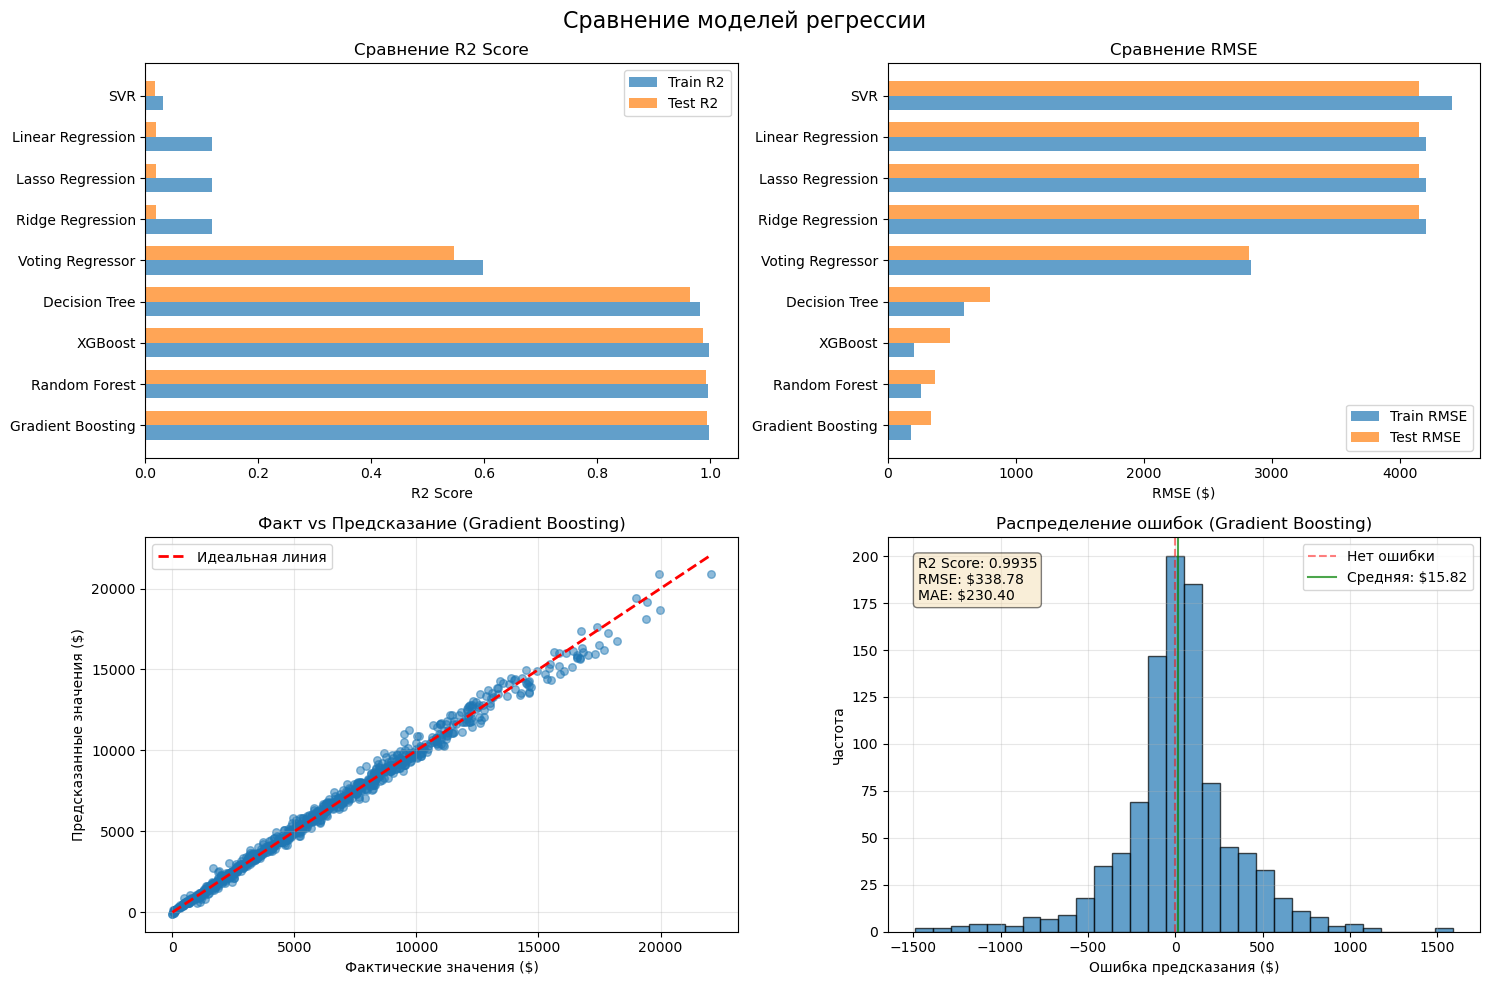

In [48]:
best_model_name = all_metrics_df.iloc[0]['Model']
best_model_pred = None

models_dict = {
    'Linear Regression': lr_pred,
    'Ridge Regression': ridge_pred,
    'Lasso Regression': lasso_pred,
    'SVR': svr_pred,
    'Decision Tree': dtr_pred,
    'Random Forest': rf_pred,
    'Gradient Boosting': gbr_pred,
    'XGBoost': xgb_pred,
    'Voting Regressor': voting_pred
}

if best_model_name in models_dict:
    best_model_pred = models_dict[best_model_name]
else:
    best_model_name = all_metrics_df.iloc[0]['Model']
    best_model_pred = models_dict.get(best_model_name, lr_pred)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Сравнение моделей регрессии', fontsize=16)

models = all_metrics_df['Model'].tolist()
test_r2 = all_metrics_df['Test R2'].tolist()
train_r2 = all_metrics_df['Train R2'].tolist()

x_pos = np.arange(len(models))
width = 0.35

bars1 = axes[0, 0].barh(x_pos - width/2, train_r2, width, label='Train R2', alpha=0.7)
bars2 = axes[0, 0].barh(x_pos + width/2, test_r2, width, label='Test R2', alpha=0.7)
axes[0, 0].set_yticks(x_pos)
axes[0, 0].set_yticklabels(models)
axes[0, 0].set_xlabel('R2 Score')
axes[0, 0].set_title('Сравнение R2 Score')
axes[0, 0].legend()
axes[0, 0].axvline(x=0, color='r', linestyle='--', alpha=0.5)

test_rmse = all_metrics_df['Test RMSE'].tolist()
train_rmse = all_metrics_df['Train RMSE'].tolist()

bars1 = axes[0, 1].barh(x_pos - width/2, train_rmse, width, label='Train RMSE', alpha=0.7)
bars2 = axes[0, 1].barh(x_pos + width/2, test_rmse, width, label='Test RMSE', alpha=0.7)
axes[0, 1].set_yticks(x_pos)
axes[0, 1].set_yticklabels(models)
axes[0, 1].set_xlabel('RMSE ($)')
axes[0, 1].set_title('Сравнение RMSE')
axes[0, 1].legend()

axes[1, 0].scatter(y_test, best_model_pred, alpha=0.5, s=30)
axes[1, 0].plot([y_test.min(), y_test.max()], 
                [y_test.min(), y_test.max()], 
                'r--', lw=2, label='Идеальная линия')
axes[1, 0].set_xlabel('Фактические значения ($)')
axes[1, 0].set_ylabel('Предсказанные значения ($)')
axes[1, 0].set_title(f'Факт vs Предсказание ({best_model_name})')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

errors = best_model_pred - y_test
axes[1, 1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Ошибка предсказания ($)')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title(f'Распределение ошибок ({best_model_name})')
axes[1, 1].axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Нет ошибки')
axes[1, 1].axvline(x=errors.mean(), color='g', linestyle='-', alpha=0.7, 
                   label=f'Средняя: ${errors.mean():.2f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

best_metrics = all_metrics_df[all_metrics_df['Model'] == best_model_name].iloc[0]
metrics_text = (f"R2 Score: {best_metrics['Test R2']:.4f}\n"
                f"RMSE: ${best_metrics['Test RMSE']:.2f}\n"
                f"MAE: ${best_metrics['Test MAE']:.2f}")

axes[1, 1].text(0.05, 0.95, metrics_text, transform=axes[1, 1].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

In [49]:
errors = best_model_pred - y_test
axes[1, 1].hist(errors, bins=30, edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Ошибка предсказания ($)')
axes[1, 1].set_ylabel('Частота')
axes[1, 1].set_title(f'Распределение ошибок ({best_model_name})')
axes[1, 1].axvline(x=0, color='r', linestyle='--', alpha=0.5, label='Нет ошибки')
axes[1, 1].axvline(x=errors.mean(), color='g', linestyle='-', alpha=0.7, 
                   label=f'Средняя: ${errors.mean():.2f}')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

In [52]:
best_metrics = all_metrics_df[all_metrics_df['Model'] == best_model_name].iloc[0]
metrics_text = (f"R2 Score: {best_metrics['Test R2']:.4f}\n"
                f"RMSE: ${best_metrics['Test RMSE']:.2f}\n"
                f"MAE: ${best_metrics['Test MAE']:.2f}")

axes[1, 1].text(0.05, 0.95, metrics_text, transform=axes[1, 1].transAxes,
                fontsize=10, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

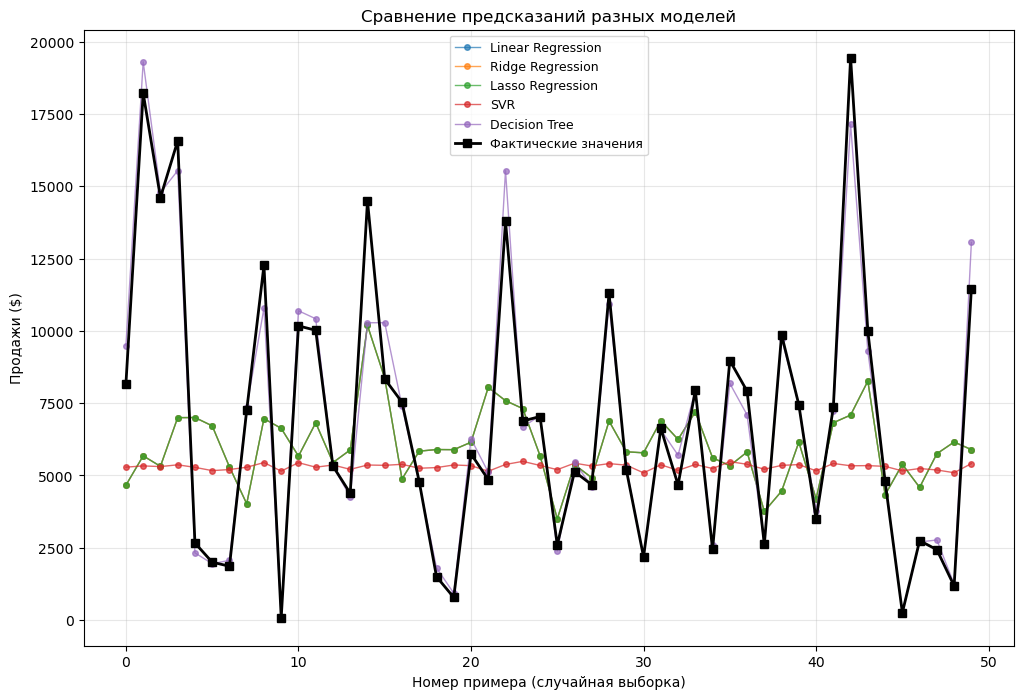

In [54]:
plt.figure(figsize=(12, 8))
sample_indices = np.random.choice(len(y_test), min(50, len(y_test)), replace=False)

for i, (model_name, pred_values) in enumerate(models_dict.items()):
    if i < 5:
        plt.plot(range(len(sample_indices)), 
                 [pred_values[idx] for idx in sample_indices],
                 marker='o', markersize=4, linewidth=1, alpha=0.7, label=model_name)

plt.plot(range(len(sample_indices)), 
         [y_test.iloc[idx] for idx in sample_indices],
         marker='s', markersize=6, linewidth=2, color='black', label='Фактические значения')

plt.xlabel('Номер примера (случайная выборка)')
plt.ylabel('Продажи ($)')
plt.title('Сравнение предсказаний разных моделей')
plt.legend(loc='best', fontsize=9)
plt.grid(True, alpha=0.3)
plt.show()

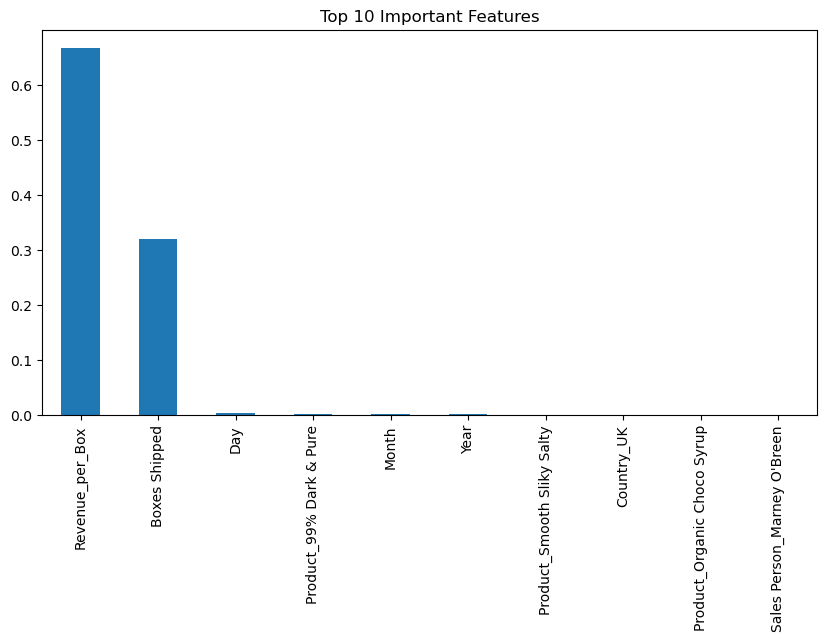

In [56]:
importances = pd.Series(
rf.feature_importances_,
index=X.columns
).sort_values(ascending=False)


importances.head(10)
plt.figure(figsize=(10,5))
importances.head(10).plot(kind='bar')
plt.title('Top 10 Important Features')
plt.show()